# US Permission VISA EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('../../../us_perm_visas.csv')

In [3]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [4]:
df.shape

(374362, 154)

In [7]:
df.isna().sum()

add_these_pw_job_title_9089      332168
agent_city                       162908
agent_firm_name                  167365
agent_state                      166123
application_type                 239093
                                  ...  
wage_offer_to_9089               300728
wage_offer_unit_of_pay_9089      115916
wage_offered_from_9089           259715
wage_offered_to_9089             343347
wage_offered_unit_of_pay_9089    303663
Length: 154, dtype: int64

In [8]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

### check numerical and categorical columns

In [10]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

In [11]:
numerical_columns

['employer_num_employees',
 'employer_yr_estab',
 'foreign_worker_yr_rel_edu_completed',
 'fw_info_yr_rel_edu_completed',
 'job_info_alt_cmb_ed_oth_yrs',
 'job_info_alt_occ_num_months',
 'job_info_experience_num_months',
 'job_info_training_num_months',
 'wage_offered_from_9089',
 'wage_offered_to_9089']

In [12]:
categorical_columns

['add_these_pw_job_title_9089',
 'agent_city',
 'agent_firm_name',
 'agent_state',
 'application_type',
 'case_no',
 'case_number',
 'case_received_date',
 'case_status',
 'class_of_admission',
 'country_of_citizenship',
 'country_of_citzenship',
 'decision_date',
 'employer_address_1',
 'employer_address_2',
 'employer_city',
 'employer_country',
 'employer_decl_info_title',
 'employer_name',
 'employer_phone',
 'employer_phone_ext',
 'employer_postal_code',
 'employer_state',
 'foreign_worker_info_alt_edu_experience',
 'foreign_worker_info_birth_country',
 'foreign_worker_info_city',
 'foreign_worker_info_education',
 'foreign_worker_info_education_other',
 'foreign_worker_info_inst',
 'foreign_worker_info_major',
 'foreign_worker_info_postal_code',
 'foreign_worker_info_rel_occup_exp',
 'foreign_worker_info_req_experience',
 'foreign_worker_info_state',
 'foreign_worker_info_training_comp',
 'foreign_worker_ownership_interest',
 'fw_info_alt_edu_experience',
 'fw_info_birth_country'

### check case status data

In [13]:
df['case_status'].unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [15]:
df.loc[df['case_status']=='Certified-Expired', 'case_status'] = 'Certified'

<Axes: ylabel='case_status'>

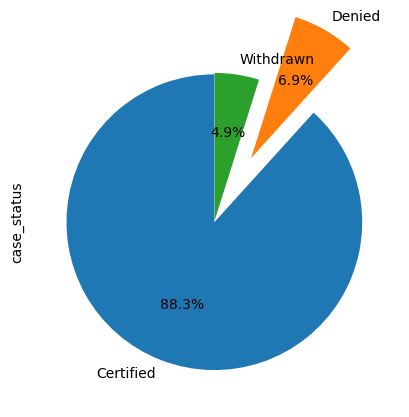

In [18]:
df['case_status'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0,0.5,0.01), startangle = 90)

In [30]:
df['application_type'].unique()

array(['PERM', 'ONLINE', 'MAILEDIN', nan], dtype=object)

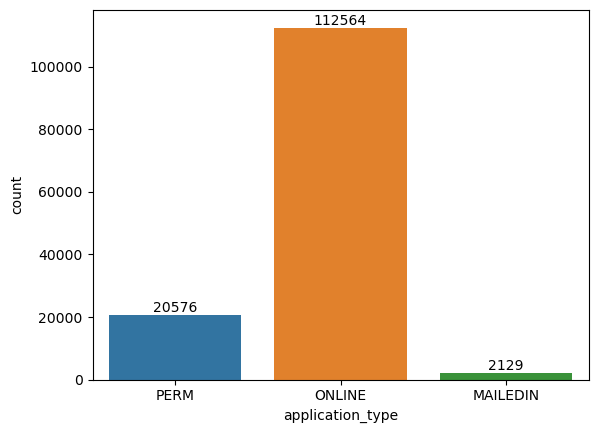

In [47]:
ax = sns.countplot( x = df['application_type'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

### handling case_no, case_number columns.

In [12]:
cases = df[['case_no','case_number']]
cases

,case_no,case_number
0,A-07323-97014,NaN
1,A-07332-99439,NaN
2,A-07333-99643,NaN
3,A-07339-01930,NaN
4,A-07345-03565,NaN
...,...,...
374357,NaN,A-16363-85407
374358,NaN,A-16271-56745
374359,NaN,A-16354-82345
374360,NaN,A-16357-84250


* check if we can fill case_number where case_no is null

In [9]:
cases['case_no'].fillna(cases['case_number'], inplace=True)

In [11]:
cases['case_no'].duplicated().value_counts()

False    373025
True       1337
Name: case_no, dtype: int64

* it's values get duplicated so we can't fill case_number, so we drop case_no

In [13]:
df.drop('case_no', axis = 1 , inplace=True)

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [19]:
df.dropna(axis = 1, how='all', inplace=True)

In [20]:
df.shape

(374362, 153)

In [21]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=153)

In [22]:
df.us_economic_sector

0                            IT
1         Other Economic Sector
2                     Aerospace
3         Other Economic Sector
4                  Advanced Mfg
                  ...          
374357                      NaN
374358                      NaN
374359                      NaN
374360                      NaN
374361                      NaN
Name: us_economic_sector, Length: 374362, dtype: object

In [23]:
df.us_economic_sector.unique()

array(['IT', 'Other Economic Sector', 'Aerospace', 'Advanced Mfg',
       'Educational Services', 'Retail', 'Construction', 'Hospitality',
       'Automotive', nan, 'Health Care', 'Agribusiness', 'Finance',
       'Energy', 'Transportation', 'Homeland Security', 'Biotechnology',
       'Geospatial'], dtype=object)

([<matplotlib.patches.Wedge at 0x22b6ea27610>,
 [Text(0.31461799424848674, 1.0540472084755308, 'IT'),
  Text(-1.0915850282332349, 0.1358017898889707, 'Advanced Mfg'),
  Text(-0.8290697974815069, -0.7229407105039619, 'Other Economic Sector'),
  Text(-0.2664096529574971, -1.0672515621028935, 'Finance'),
  Text(0.2208259943987078, -1.0776065516680111, 'Educational Services'),
  Text(0.6124345616771129, -0.9137417073021035, 'Health Care'),
  Text(0.8364170194444438, -0.7144274417907485, 'Retail'),
  Text(0.9662867356053295, -0.5256328990780507, 'Aerospace'),
  Text(1.0333399854920204, -0.3771053889608994, 'Hospitality'),
  Text(1.0605155053701618, -0.2920733861026549, 'Construction'),
  Text(1.0767109913882806, -0.22515203979459333, 'Automotive'),
  Text(1.0874172309770083, -0.16590288054851854, 'Energy'),
  Text(1.0942978258247653, -0.11185825135049973, 'Transportation'),
  Text(1.0982811663632213, -0.06146933879457544, 'Agribusiness'),
  Text(1.099734893629135, -0.02414878329265349, 'Bio

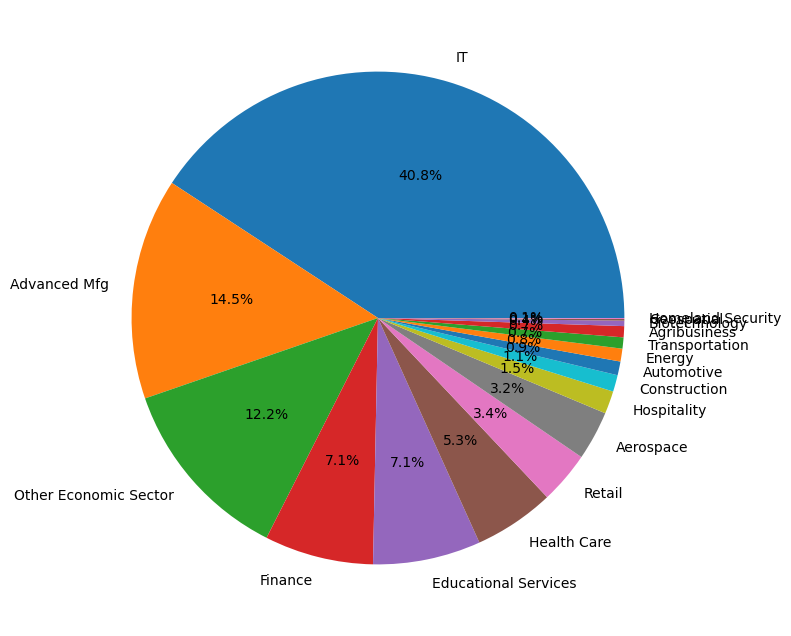

In [27]:
plt.figure(figsize=(8,8))
economic  = df['us_economic_sector'].value_counts()
plt.pie(economic, labels=economic.index, autopct='%1.1f%%')

In [3]:
df['decision_date'] = pd.to_datetime(df['decision_date'])
df['year'] = df['decision_date'].dt.year

In [4]:
df['year']

0         2012
1         2011
2         2011
3         2011
4         2012
          ... 
374357    2016
374358    2016
374359    2016
374360    2016
374361    2016
Name: year, Length: 374362, dtype: int64

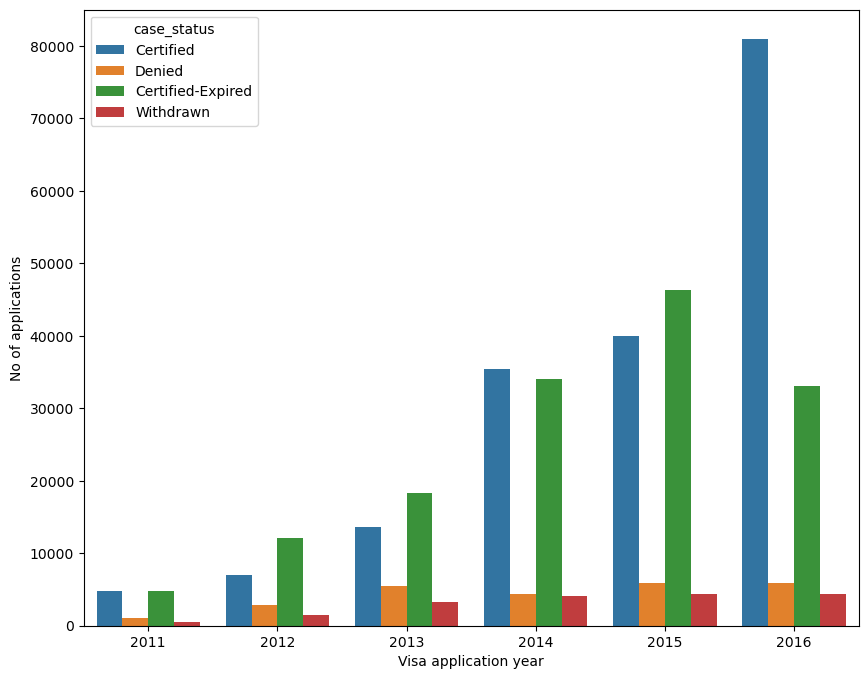

In [5]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.countplot(x = 'year', hue='case_status', data=df)
ax.set(xlabel = "Visa application year", ylabel = "No of applications")
plt.show()

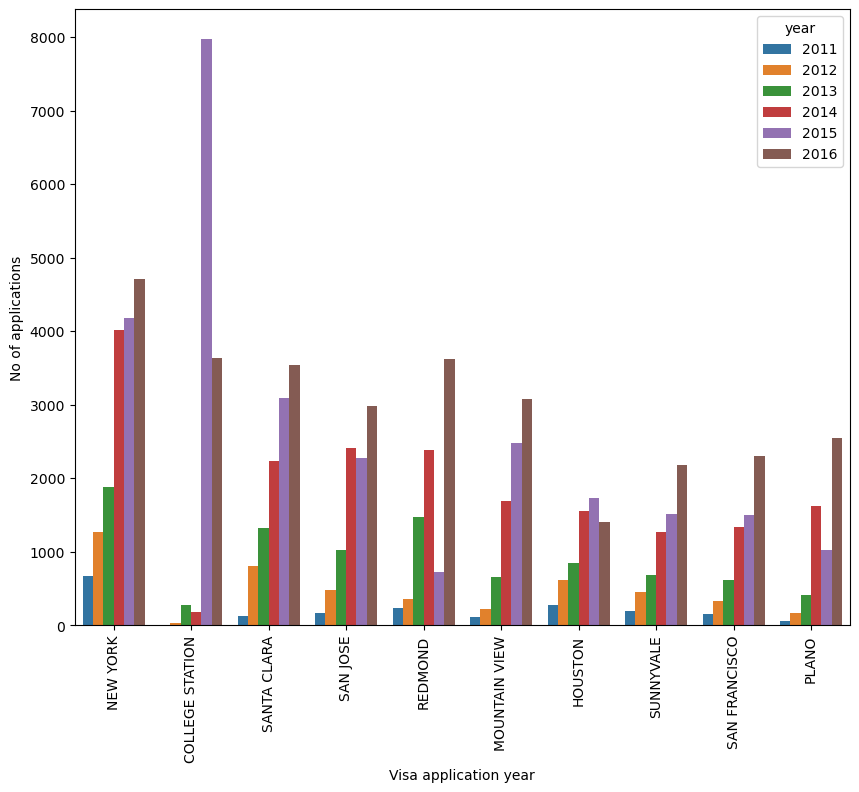

In [6]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.countplot(x = 'employer_city', hue='year', data=df, order = df.employer_city.value_counts().iloc[:10].index)
ax.set(xlabel = "Visa application year", ylabel = "No of applications")
plt.xticks(rotation =90)
plt.show()